In [1]:
# prompt: Gerar um dataset com campos relacionados a finanças pessoais para analisar comportamento de consumo com 1000 exemplos inserindo valores nulos e outliers sendo a primeira coluna a de ID que representa o identificador único para cada registro com os dados separados por ponto e vírgula

import pandas as pd
import numpy as np
import random

# Define o número de exemplos
n_exemplos = 1000

# Cria um DataFrame vazio
df = pd.DataFrame()

# Gera os IDs
df['ID'] = range(1, n_exemplos + 1)


# Função para gerar outliers
def gerar_outlier(valor):
    if random.random() < 0.05:  # 5% de chance de outlier
        return valor * (random.uniform(1.5, 5) if random.random() < 0.5 else -random.uniform(1.5, 5)) #valor entre 1.5 e 5 vezes o valor original, ou -1.5 a -5 vezes
    return valor

# Lista de colunas e suas distribuições
colunas = {
    'Renda Mensal': (1500, 10000), # Média e desvio padrão
    'Despesas Fixas': (500, 3000),
    'Despesas Variáveis': (200, 2000),
    'Investimentos': (0, 5000),
    'Dívidas': (0, 5000),
    'Patrimônio Líquido': (0, 50000)
}

# Gera os dados para cada coluna
for nome, (media, desvio_padrao) in colunas.items():
  dados = np.random.normal(media, desvio_padrao, n_exemplos)
  dados = [gerar_outlier(valor) for valor in dados]
  df[nome] = dados

# Insere valores nulos
for coluna in df.columns[1:]: # Pula a coluna 'ID'
    for i in range(int(n_exemplos * 0.05)): # 5% de valores nulos por coluna
      df.loc[random.randint(0, n_exemplos -1), coluna] = np.nan

# Salva o DataFrame em um arquivo CSV com ponto e vírgula como separador
df.to_csv('financas_pessoais.csv', sep=';', index=False)

In [2]:
# prompt: Usar o nome do csv gerado e carregar o arquivo em um dataframe separado por ponto e vírgula exibindo as 10 primeiras linhas do dataset no formato string

import pandas as pd

# Carrega o arquivo CSV em um DataFrame, especificando o separador como ponto e vírgula
df_novo = pd.read_csv('financas_pessoais.csv', sep=';')

# Exibe as 10 primeiras linhas do DataFrame no formato string
print(df_novo.head(10).to_string())

   ID  Renda Mensal  Despesas Fixas  Despesas Variáveis  Investimentos      Dívidas  Patrimônio Líquido
0   1  -9213.118758     -366.822827         2628.426560   -1538.813511 -4450.205589        92346.008059
1   2  23918.239838      950.087493         -830.576744     -51.668124 -3185.859498       -27858.426344
2   3 -44741.884306      775.685749          548.386265   -1158.108587 -9551.515083        13508.844895
3   4  -9210.860833     3909.023833         7401.475507   -4153.747986 -4303.593998        49775.655315
4   5  11911.580260      499.666963        -2146.142701    6542.233808  6584.077671          597.813101
5   6   2497.518779      952.379438        -2439.680264    2794.001903 -2128.257713        -5913.499355
6   7 -21200.130535    -2711.075503           45.828903   -1733.616096  6545.805422       139310.189883
7   8 -14006.501008    -2711.978239         -187.998498    6544.397033   335.282070       -80268.006960
8   9   3105.583946    -2762.744807         1048.866624  -10108.

In [3]:
# prompt: Exibir os dados do dataset no formato string

# Exibe as 10 primeiras linhas do DataFrame no formato string
print(df_novo.head(10).to_string())

   ID  Renda Mensal  Despesas Fixas  Despesas Variáveis  Investimentos      Dívidas  Patrimônio Líquido
0   1  -9213.118758     -366.822827         2628.426560   -1538.813511 -4450.205589        92346.008059
1   2  23918.239838      950.087493         -830.576744     -51.668124 -3185.859498       -27858.426344
2   3 -44741.884306      775.685749          548.386265   -1158.108587 -9551.515083        13508.844895
3   4  -9210.860833     3909.023833         7401.475507   -4153.747986 -4303.593998        49775.655315
4   5  11911.580260      499.666963        -2146.142701    6542.233808  6584.077671          597.813101
5   6   2497.518779      952.379438        -2439.680264    2794.001903 -2128.257713        -5913.499355
6   7 -21200.130535    -2711.075503           45.828903   -1733.616096  6545.805422       139310.189883
7   8 -14006.501008    -2711.978239         -187.998498    6544.397033   335.282070       -80268.006960
8   9   3105.583946    -2762.744807         1048.866624  -10108.

In [4]:
# prompt: Exibir informações sobre o dataset

# Exibe informações sobre o DataFrame
print(df_novo.info())

# Exibe estatísticas descritivas do DataFrame
print(df_novo.describe())

# Exibe a quantidade de valores nulos por coluna
print(df_novo.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  1000 non-null   int64  
 1   Renda Mensal        950 non-null    float64
 2   Despesas Fixas      950 non-null    float64
 3   Despesas Variáveis  952 non-null    float64
 4   Investimentos       951 non-null    float64
 5   Dívidas             951 non-null    float64
 6   Patrimônio Líquido  951 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 54.8 KB
None
                ID  Renda Mensal  Despesas Fixas  Despesas Variáveis  \
count  1000.000000    950.000000      950.000000          952.000000   
mean    500.500000   1392.818215      468.964637          266.402926   
std     288.819436  12118.073318     3748.455006         2406.804921   
min       1.000000 -72594.190667   -26115.311966       -15542.148907   
25%     250.750000  -5556.515947    -1

In [5]:
# prompt: Exibir as informações do dataset

# Exibe as primeiras linhas do DataFrame
print(df_novo.head())

# Exibe as últimas linhas do DataFrame
print(df_novo.tail())

# Exibe uma amostra aleatória do DataFrame
print(df_novo.sample(5))

   ID  Renda Mensal  Despesas Fixas  Despesas Variáveis  Investimentos  \
0   1  -9213.118758     -366.822827         2628.426560   -1538.813511   
1   2  23918.239838      950.087493         -830.576744     -51.668124   
2   3 -44741.884306      775.685749          548.386265   -1158.108587   
3   4  -9210.860833     3909.023833         7401.475507   -4153.747986   
4   5  11911.580260      499.666963        -2146.142701    6542.233808   

       Dívidas  Patrimônio Líquido  
0 -4450.205589        92346.008059  
1 -3185.859498       -27858.426344  
2 -9551.515083        13508.844895  
3 -4303.593998        49775.655315  
4  6584.077671          597.813101  
       ID  Renda Mensal  Despesas Fixas  Despesas Variáveis  Investimentos  \
995   996   5938.517056     -400.219501        -1381.188244   -5122.473742   
996   997 -18493.666215     1418.199012         1895.270932            NaN   
997   998  -3650.396572     4402.260387         -978.996118   -4346.262719   
998   999  11378.6983

In [6]:
# prompt: Exibir as dimensões do dataset

df_novo.shape

(1000, 7)

In [7]:
# prompt: Exibir os nomes das colunas do dataset

import pandas as pd

# Carrega o arquivo CSV em um DataFrame, especificando o separador como ponto e vírgula
df_novo = pd.read_csv('financas_pessoais.csv', sep=';')

# Exibe os nomes das colunas
df_novo.columns

Index(['ID', 'Renda Mensal', 'Despesas Fixas', 'Despesas Variáveis',
       'Investimentos', 'Dívidas', 'Patrimônio Líquido'],
      dtype='object')

In [8]:
# prompt: Exibir os tipos de dados de cada coluna do dataset

# Exibir os tipos de dados de cada coluna
df_novo.dtypes

,0
ID,int64
Renda Mensal,float64
Despesas Fixas,float64
Despesas Variáveis,float64
Investimentos,float64
Dívidas,float64
Patrimônio Líquido,float64


In [9]:
# prompt: Exibir estatísticas descritivas do dataset

# Exibe estatísticas descritivas do DataFrame
print(df_novo.describe(include='all'))

                ID  Renda Mensal  Despesas Fixas  Despesas Variáveis  \
count  1000.000000    950.000000      950.000000          952.000000   
mean    500.500000   1392.818215      468.964637          266.402926   
std     288.819436  12118.073318     3748.455006         2406.804921   
min       1.000000 -72594.190667   -26115.311966       -15542.148907   
25%     250.750000  -5556.515947    -1734.319212        -1136.171613   
50%     500.500000   1126.753337      592.152007          299.435782   
75%     750.250000   8989.799406     2741.188852         1550.589611   
max    1000.000000  74706.064986    18431.242775        16399.171359   

       Investimentos       Dívidas  Patrimônio Líquido  
count     951.000000    951.000000          951.000000  
mean      139.134833   -164.322078         -150.872230  
std      5944.090269   6777.228684        61016.485382  
min    -29306.590997 -45293.118426      -377138.129436  
25%     -3265.919791  -3887.648535       -35675.984784  
50%      

In [10]:
# prompt: Exibir o valor único dos dados de cada metadado do dataset

# Exibir o valor único dos dados de cada metadado do dataset
for column in df_novo.columns:
    print(f"Valores únicos da coluna '{column}':")
    print(df_novo[column].unique())
    print("-" * 20)

Valores únicos da coluna 'ID':
[   1    2    3    4    5    6    7    8    9   10   11   12   13   14
   15   16   17   18   19   20   21   22   23   24   25   26   27   28
   29   30   31   32   33   34   35   36   37   38   39   40   41   42
   43   44   45   46   47   48   49   50   51   52   53   54   55   56
   57   58   59   60   61   62   63   64   65   66   67   68   69   70
   71   72   73   74   75   76   77   78   79   80   81   82   83   84
   85   86   87   88   89   90   91   92   93   94   95   96   97   98
   99  100  101  102  103  104  105  106  107  108  109  110  111  112
  113  114  115  116  117  118  119  120  121  122  123  124  125  126
  127  128  129  130  131  132  133  134  135  136  137  138  139  140
  141  142  143  144  145  146  147  148  149  150  151  152  153  154
  155  156  157  158  159  160  161  162  163  164  165  166  167  168
  169  170  171  172  173  174  175  176  177  178  179  180  181  182
  183  184  185  186  187  188  189  190  191 

In [11]:
# prompt: Exibir a quantidade de valores nulos por campo do dataset

print(df_novo.isnull().sum())

ID                     0
Renda Mensal          50
Despesas Fixas        50
Despesas Variáveis    48
Investimentos         49
Dívidas               49
Patrimônio Líquido    49
dtype: int64


In [12]:
# prompt: Preencher os valores nulos de cada coluna do dataset com a moda sem usar o inplace no dataset

# ... (código anterior permanece inalterado)

# Preencher valores nulos com a moda de cada coluna
df_sem_nulos = df_novo.copy() #cria uma cópia do dataframe para não alterar o original

for coluna in df_sem_nulos.columns[1:]:  # Ignora a coluna 'ID'
    moda = df_sem_nulos[coluna].mode()[0]
    df_sem_nulos[coluna] = df_sem_nulos[coluna].fillna(moda)

print(df_sem_nulos.isnull().sum())

ID                    0
Renda Mensal          0
Despesas Fixas        0
Despesas Variáveis    0
Investimentos         0
Dívidas               0
Patrimônio Líquido    0
dtype: int64


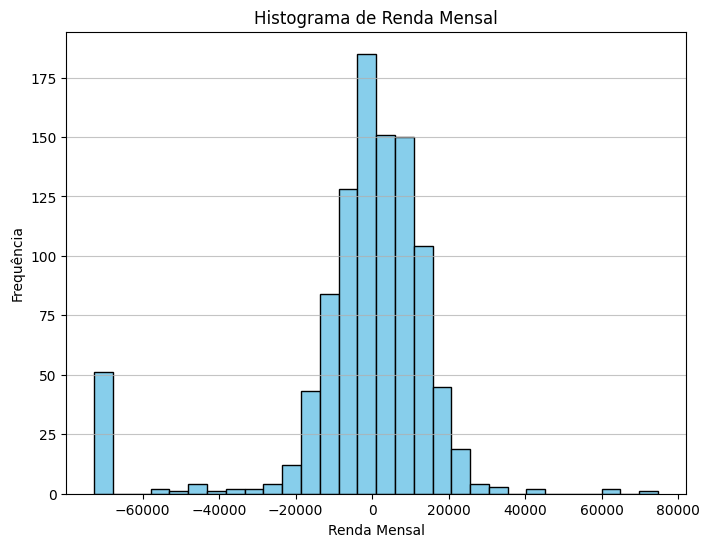

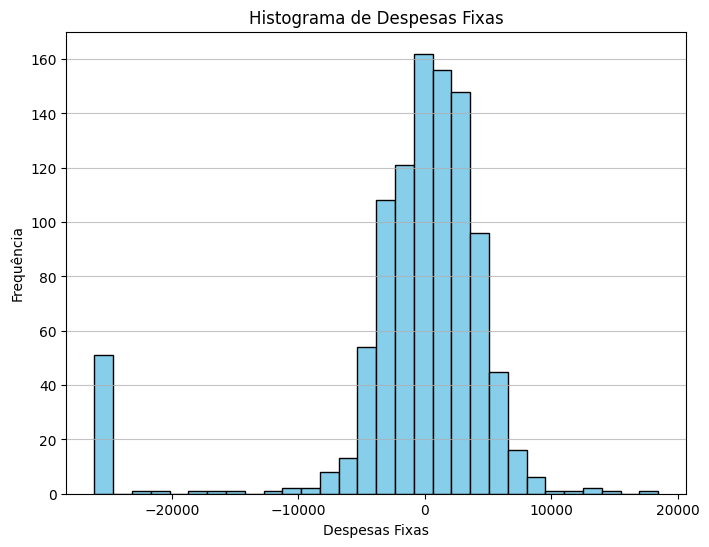

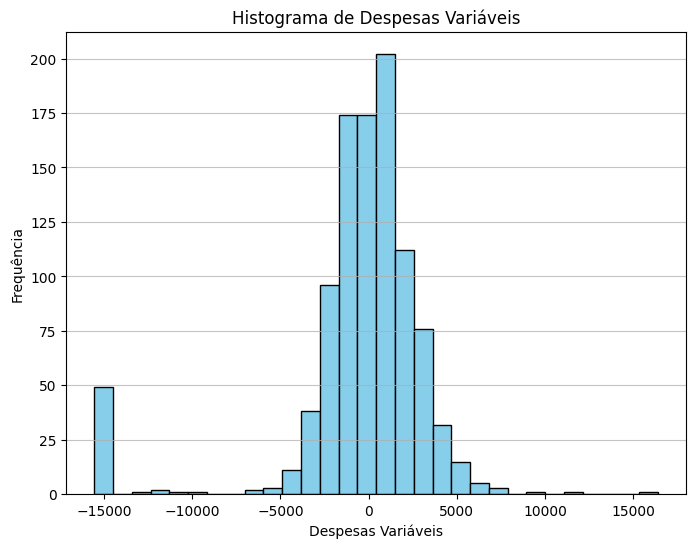

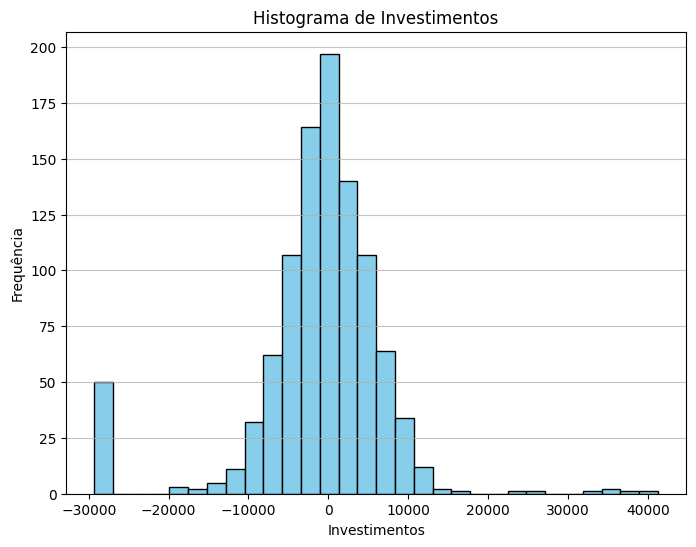

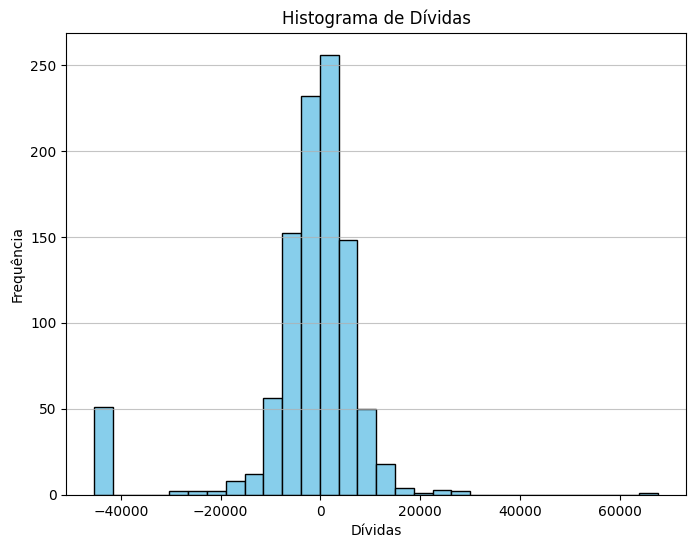

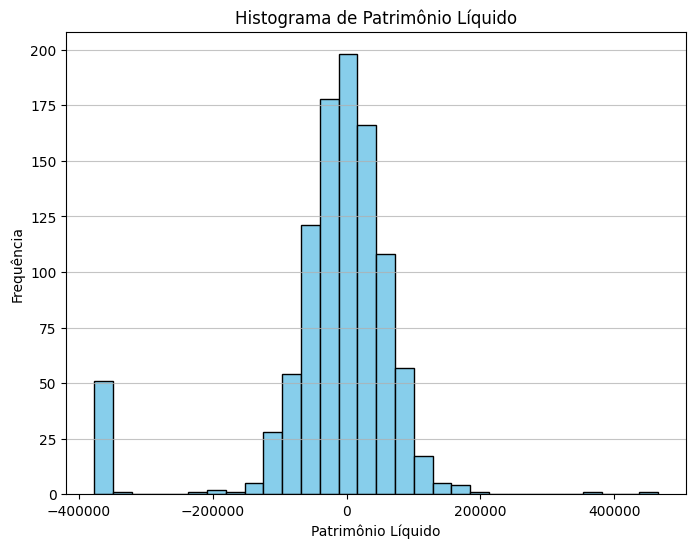

In [13]:
# prompt: Exibir histogramas dos dados do dataset

import matplotlib.pyplot as plt

# ... (código anterior permanece inalterado)

# Histograma para cada coluna numérica
for coluna in df_sem_nulos.columns[1:]: #ignora a coluna ID
    plt.figure(figsize=(8, 6))  # Define o tamanho da figura
    plt.hist(df_sem_nulos[coluna], bins=30, color='skyblue', edgecolor='black') #bins define o número de barras do histograma
    plt.title(f'Histograma de {coluna}')
    plt.xlabel(coluna)
    plt.ylabel('Frequência')
    plt.grid(axis='y', alpha=0.75)
    plt.show()

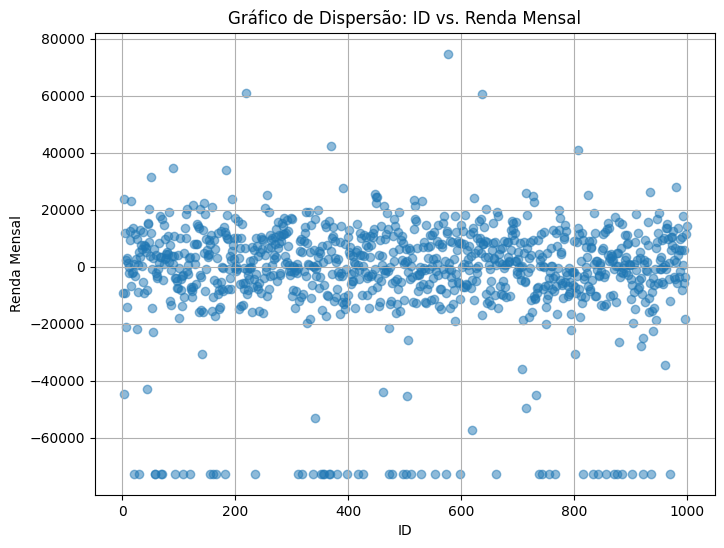

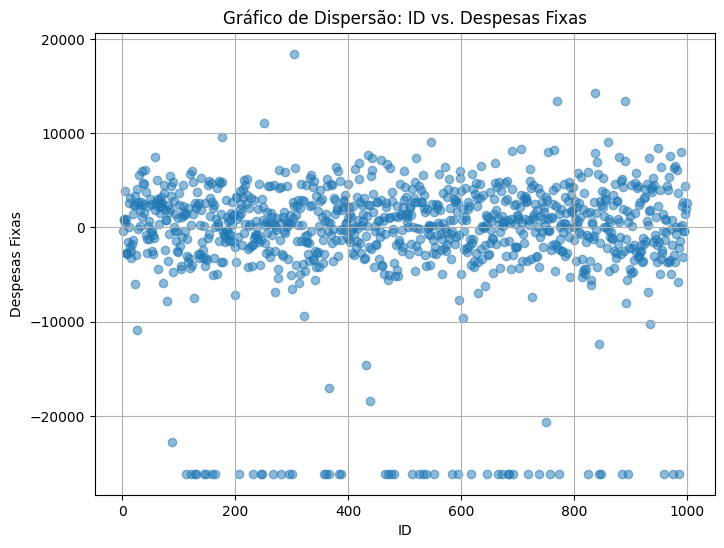

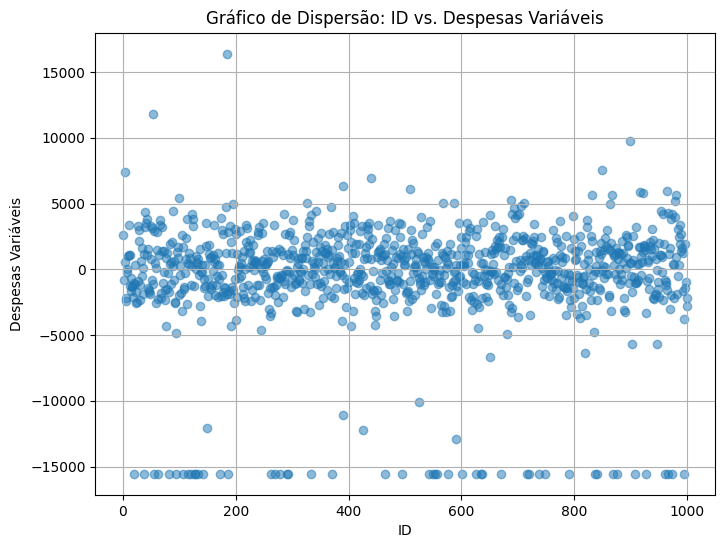

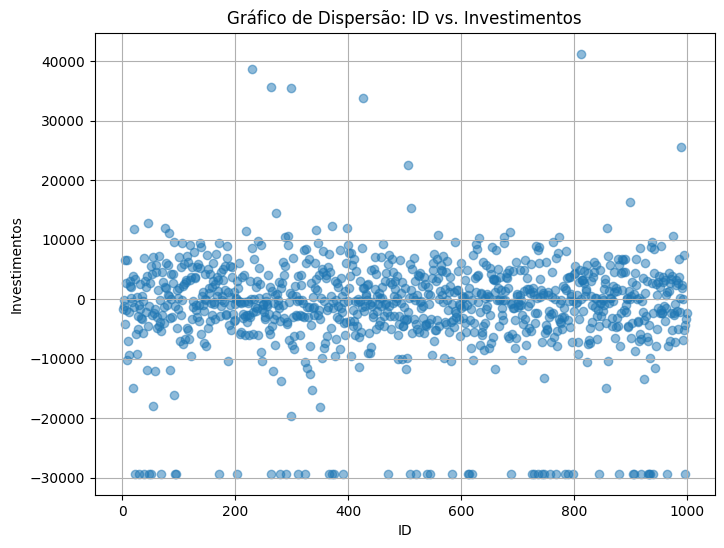

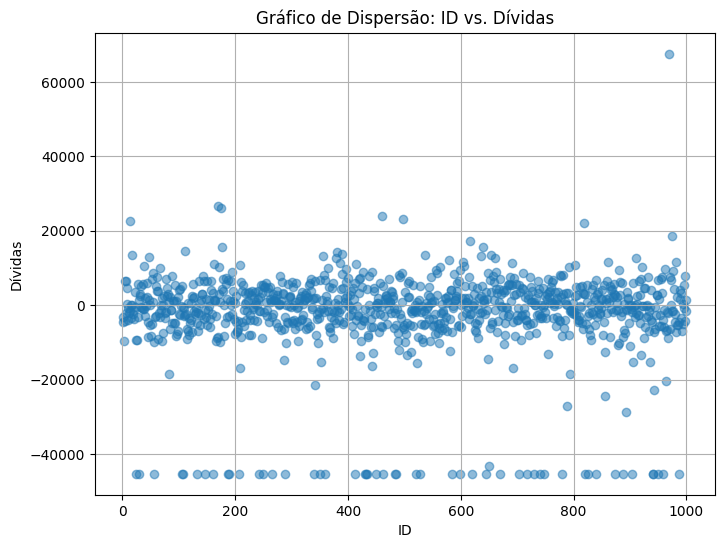

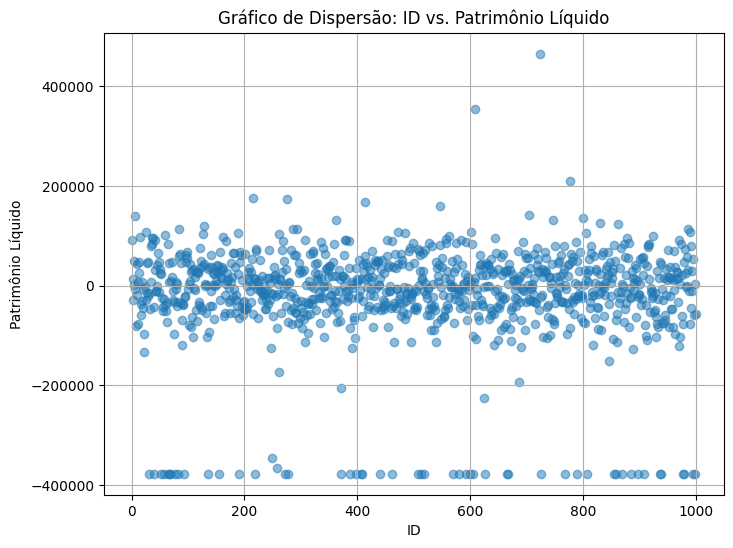

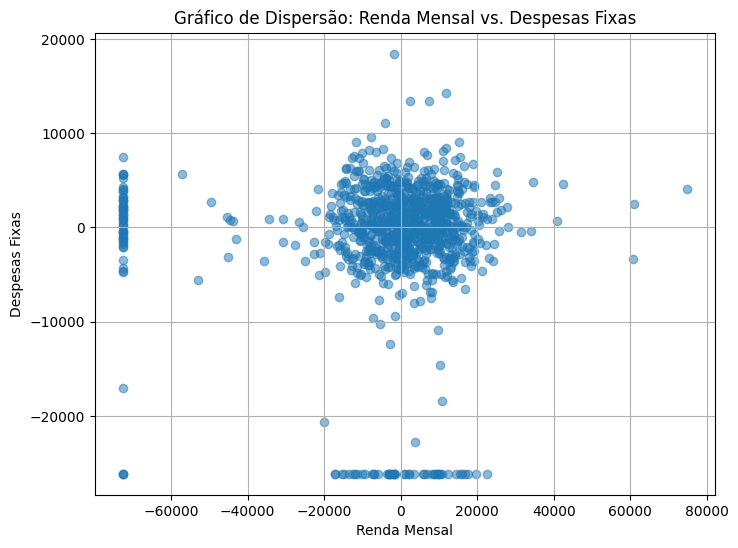

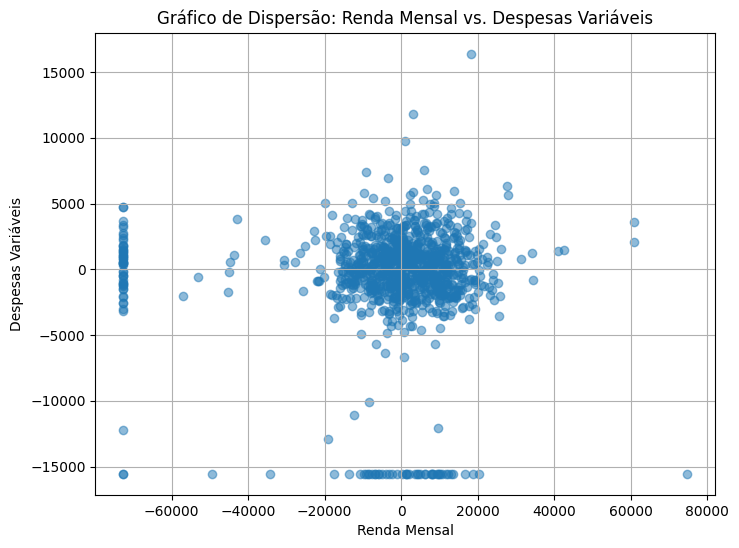

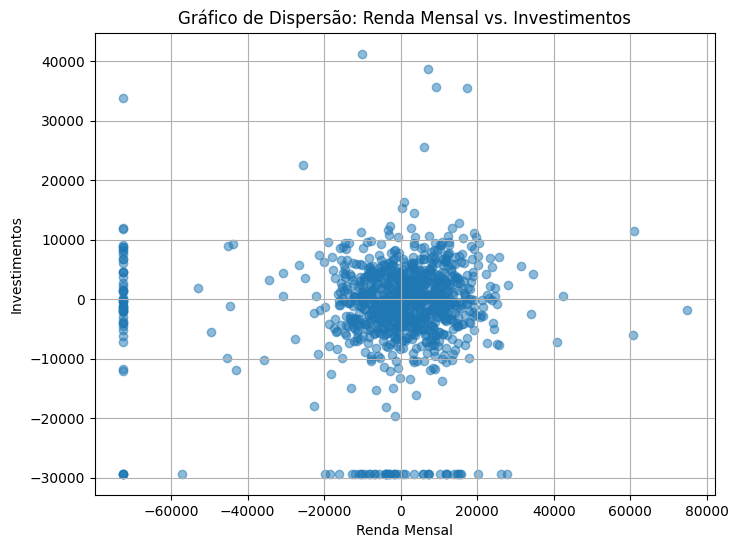

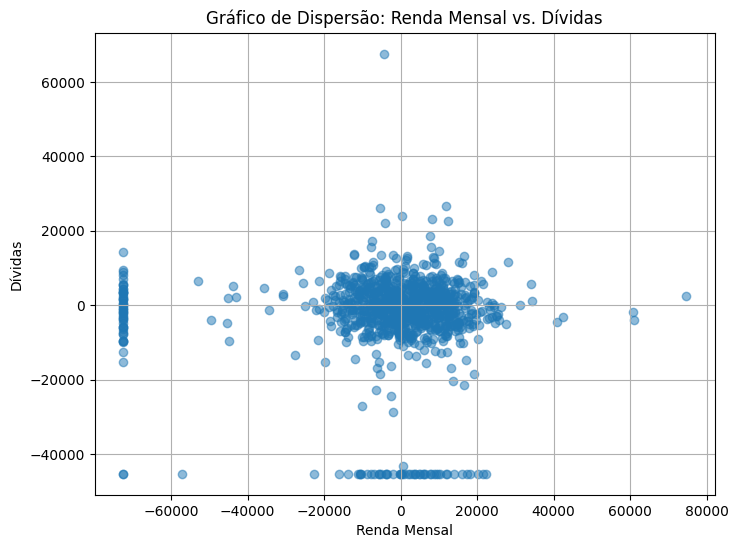

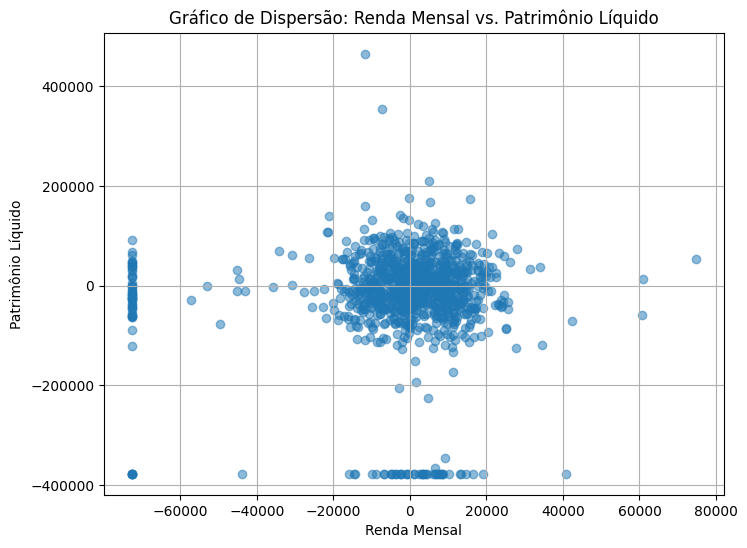

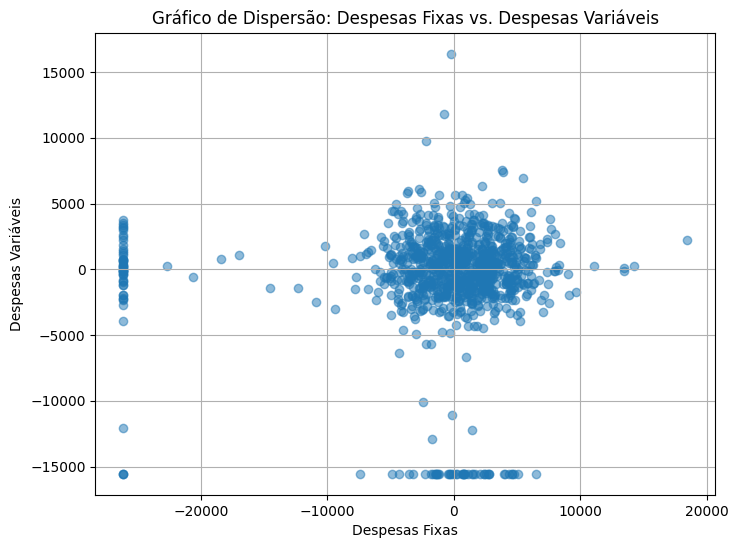

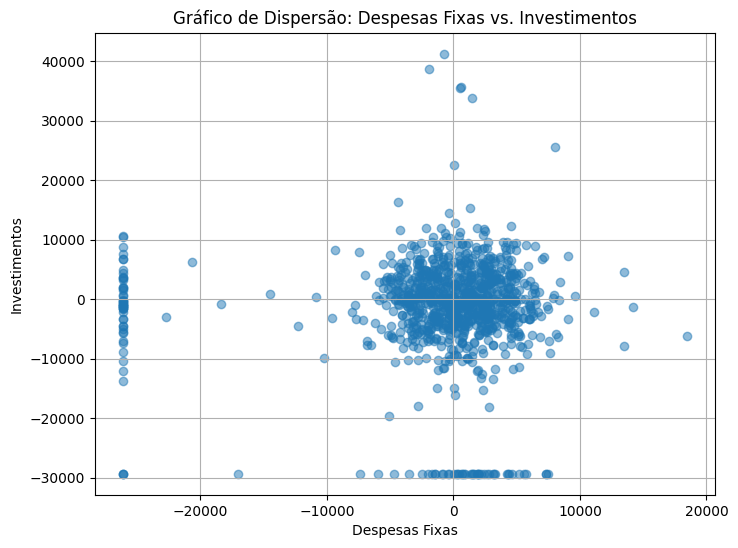

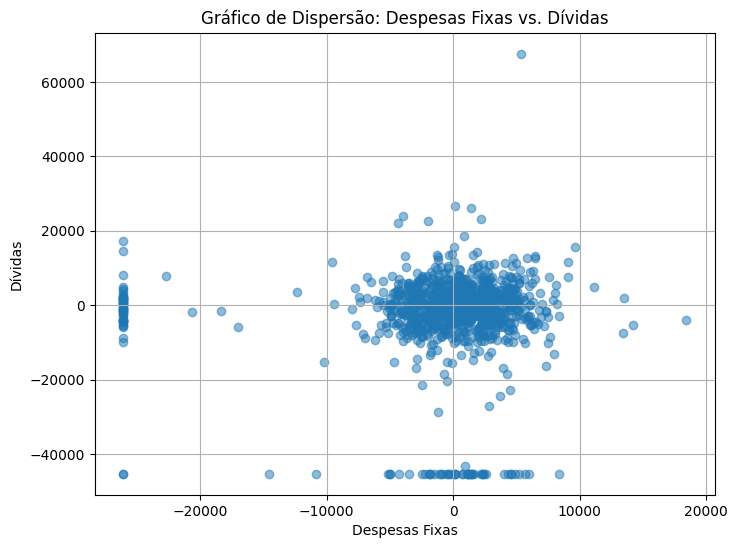

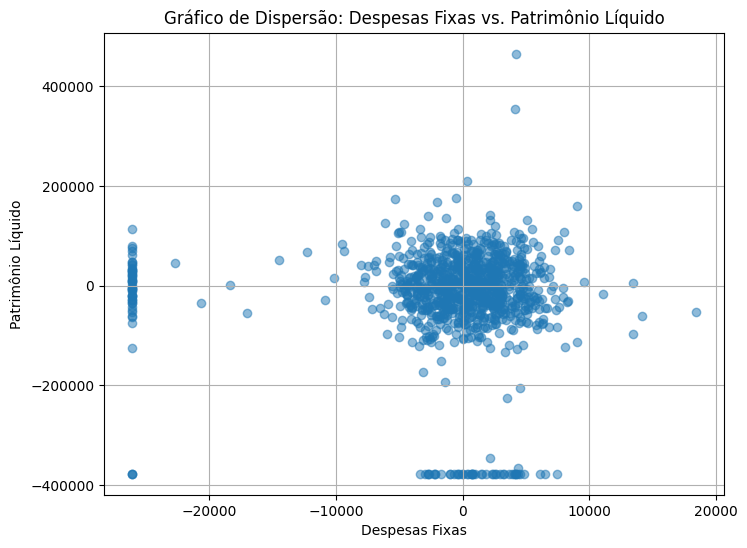

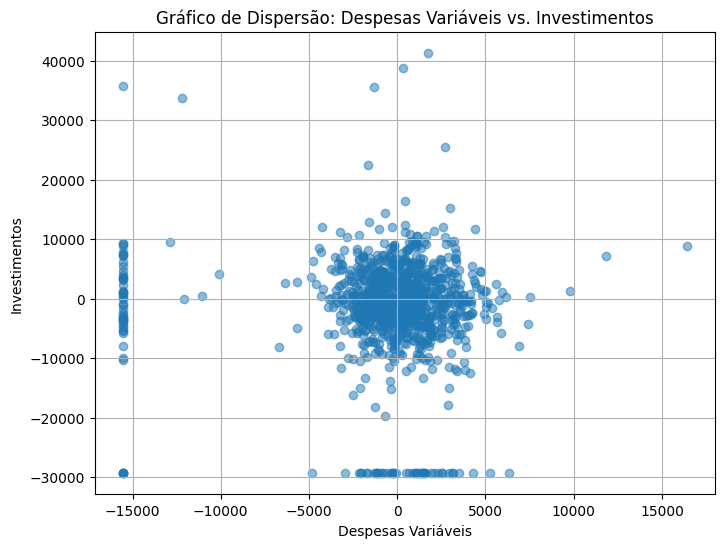

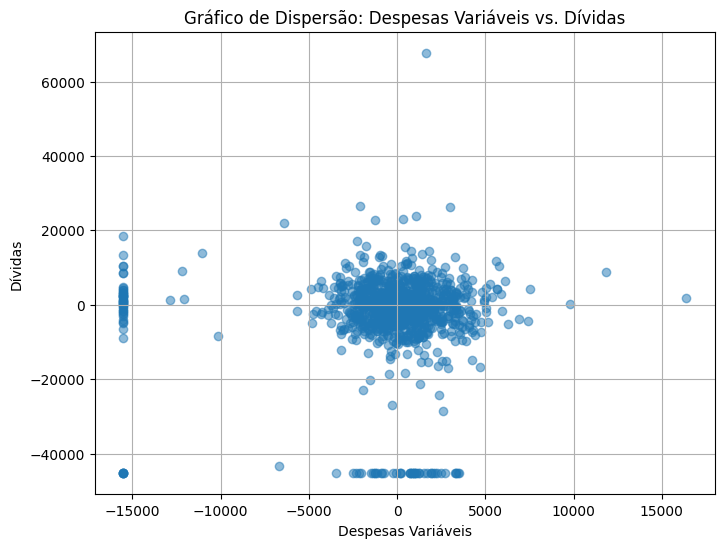

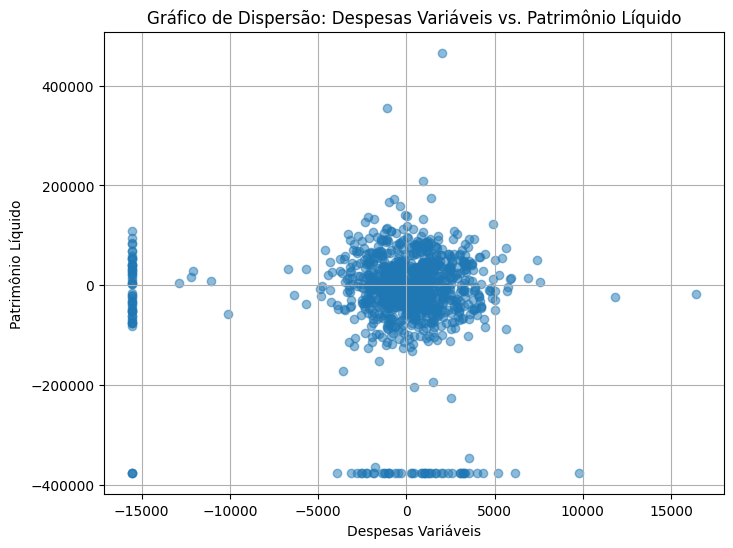

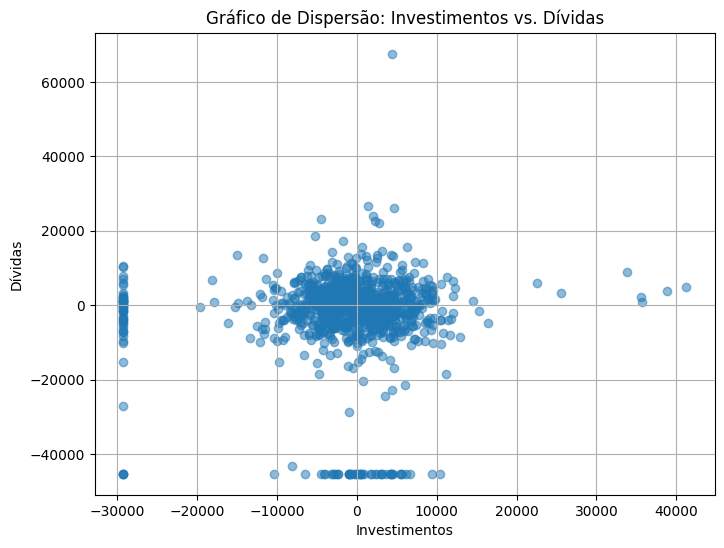

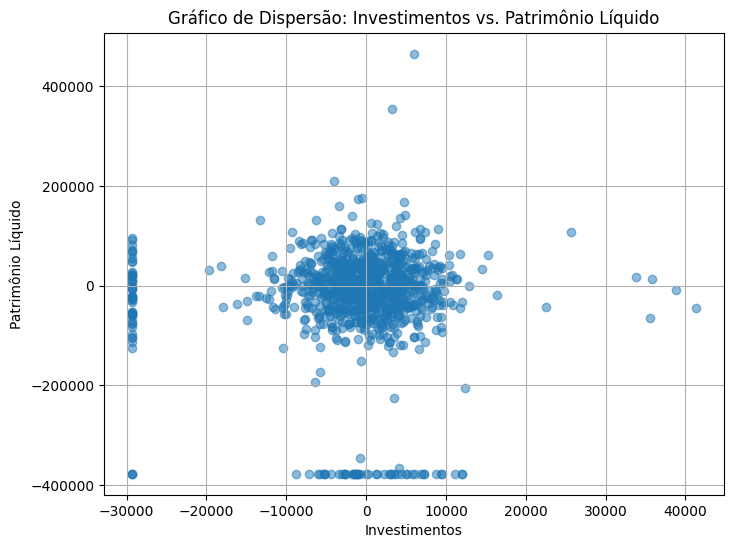

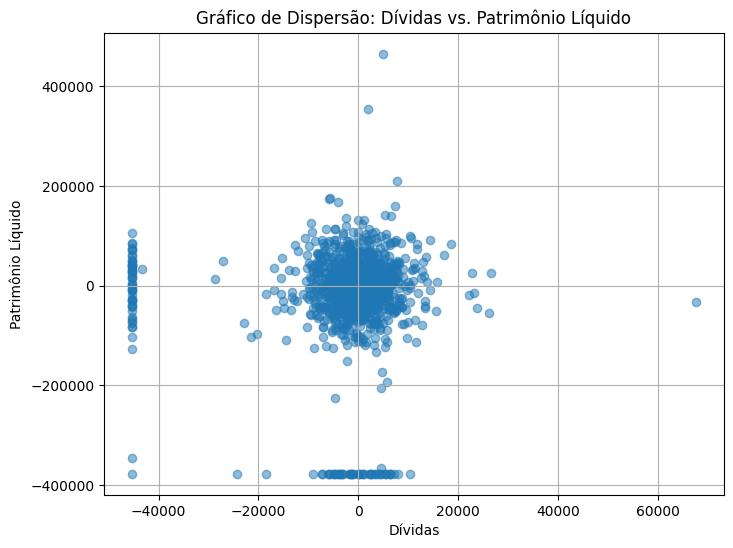

In [14]:
# prompt: Exibir gráficos de dispersão dos campos do dataset

# ... (código anterior permanece inalterado)

# Gráficos de dispersão para cada par de colunas numéricas
colunas_numericas = df_sem_nulos.select_dtypes(include=np.number).columns
for i in range(len(colunas_numericas)):
    for j in range(i + 1, len(colunas_numericas)):
        coluna1 = colunas_numericas[i]
        coluna2 = colunas_numericas[j]
        plt.figure(figsize=(8, 6))
        plt.scatter(df_sem_nulos[coluna1], df_sem_nulos[coluna2], alpha=0.5)  # alpha define a transparência dos pontos
        plt.title(f'Gráfico de Dispersão: {coluna1} vs. {coluna2}')
        plt.xlabel(coluna1)
        plt.ylabel(coluna2)
        plt.grid(True)
        plt.show()

In [15]:
# prompt: Selecionar apenas colunas numéricas; Inicializar contador de outliers; Detectar outliers usando o método IQR para cada coluna numérica; Contar outlier; Calcular o percentual de contaminação de outliers no dataset

# ... (código anterior permanece inalterado)

# Selecionar apenas colunas numéricas
colunas_numericas = df_sem_nulos.select_dtypes(include=np.number).columns

# Inicializar contador de outliers
contador_outliers = 0

# Detectar outliers usando o método IQR para cada coluna numérica
for coluna in colunas_numericas:
    Q1 = df_sem_nulos[coluna].quantile(0.25)
    Q3 = df_sem_nulos[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Contar outliers
    outliers = df_sem_nulos[(df_sem_nulos[coluna] < limite_inferior) | (df_sem_nulos[coluna] > limite_superior)]
    contador_outliers += len(outliers)

# Calcular o percentual de contaminação de outliers no dataset
percentual_contaminacao = (contador_outliers / len(df_sem_nulos)) * 100

print(f"Número total de outliers: {contador_outliers}")
print(f"Percentual de contaminação por outliers: {percentual_contaminacao:.2f}%")

Número total de outliers: 407
Percentual de contaminação por outliers: 40.70%


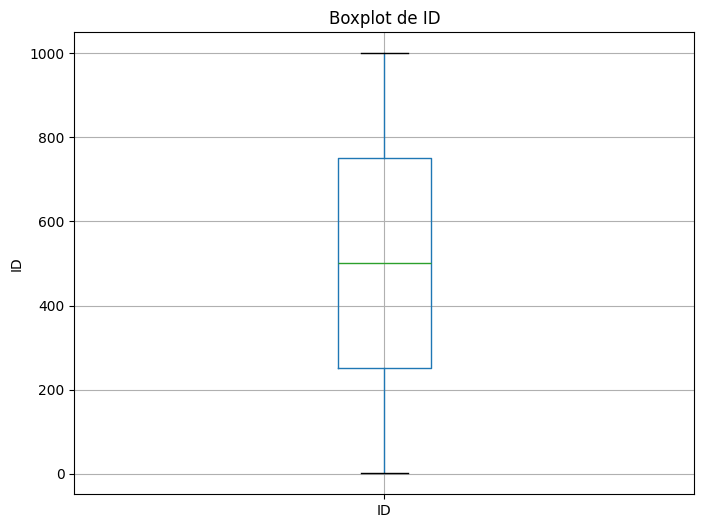

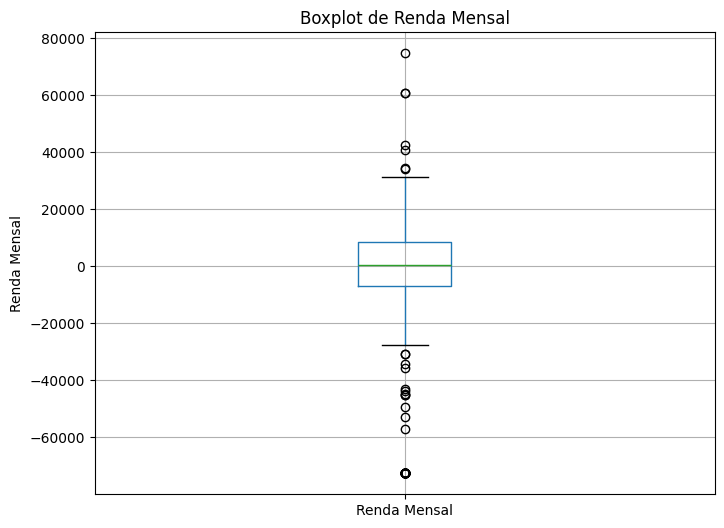

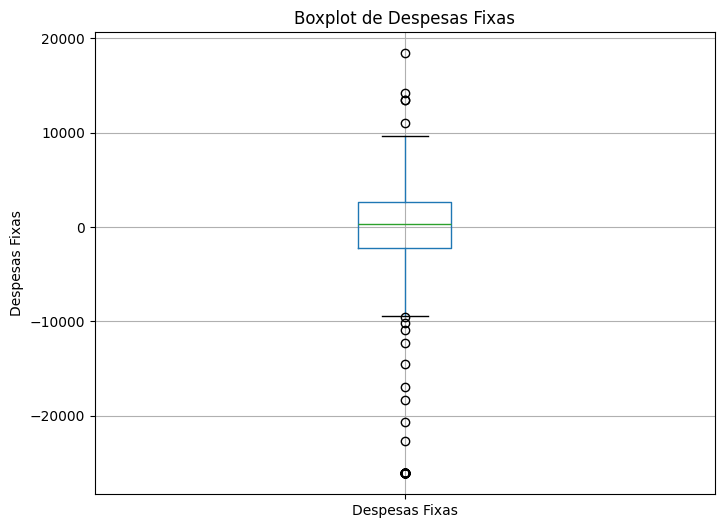

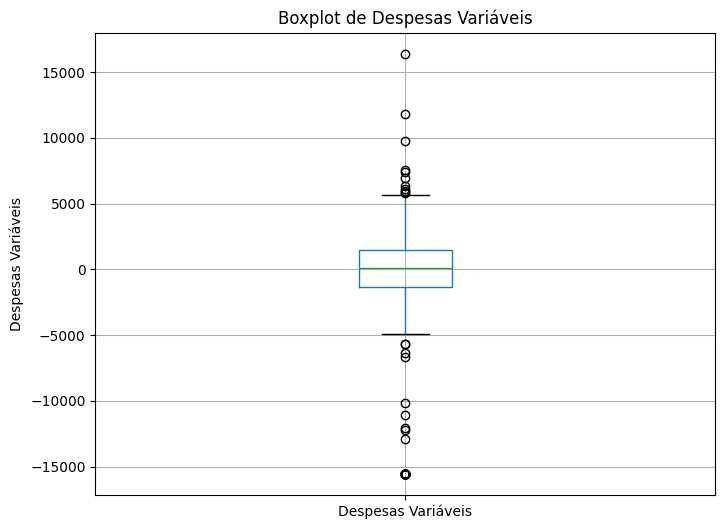

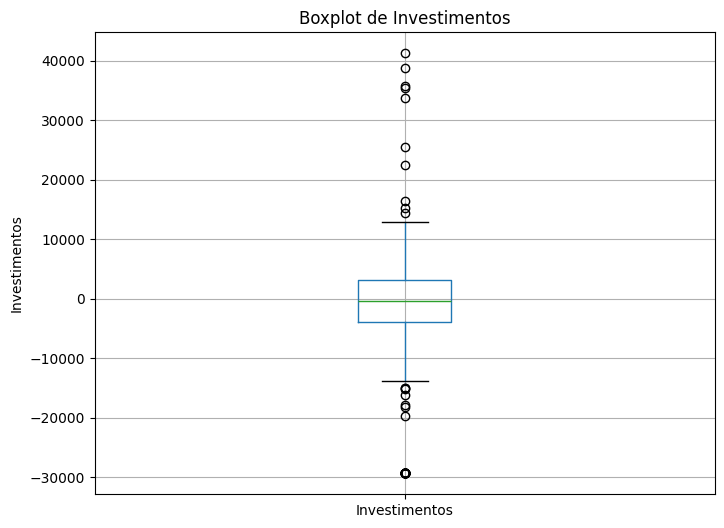

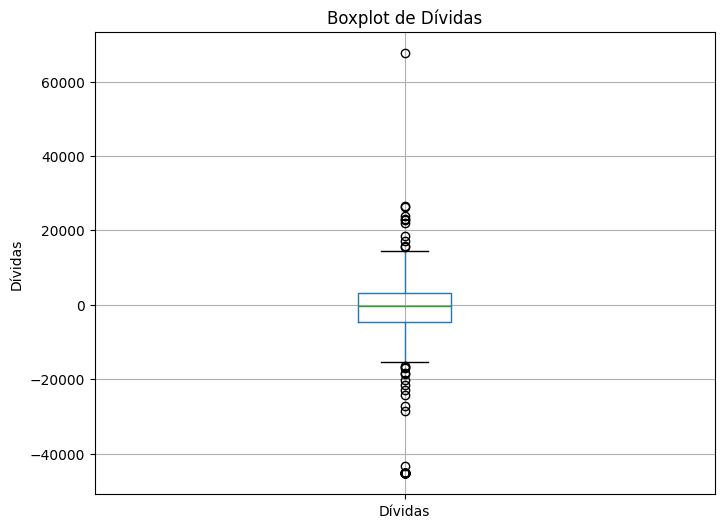

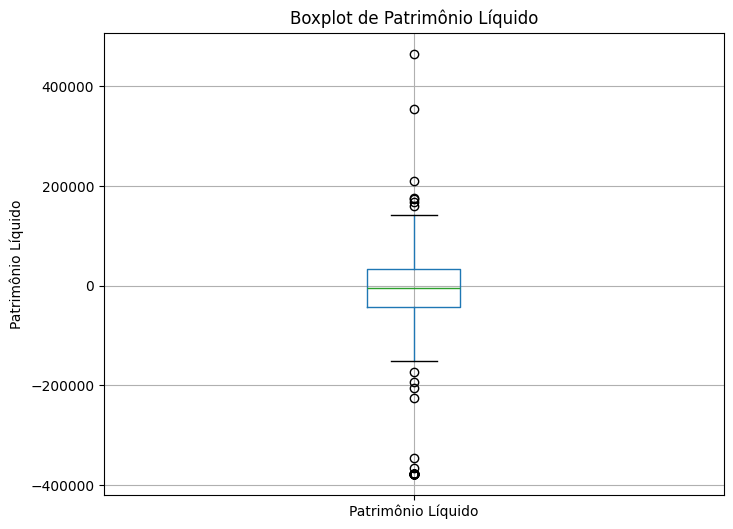

In [16]:
# prompt: Exibir boxplot para cada coluna numérica para visualizar os outliers do dataset

# ... (código anterior permanece inalterado)

# Boxplot para cada coluna numérica
for coluna in colunas_numericas:
    plt.figure(figsize=(8, 6))
    df_sem_nulos.boxplot(column=[coluna])
    plt.title(f'Boxplot de {coluna}')
    plt.ylabel(coluna)
    plt.show()

In [17]:
# prompt: Usando a técnica de Isolation Forest com o percentual de contaminação definido obter os inliers e outliers exibindo os dados

from sklearn.ensemble import IsolationForest

# Substitua 0.05 pelo percentual de contaminação desejado
percentual_contaminacao = 0.05

# Crie um modelo IsolationForest
modelo_isolation_forest = IsolationForest(contamination=percentual_contaminacao, random_state=42)

# Treine o modelo com os dados (apenas colunas numéricas)
modelo_isolation_forest.fit(df_sem_nulos[colunas_numericas])

# Preveja os outliers (-1 para outlier, 1 para inlier)
previsoes = modelo_isolation_forest.predict(df_sem_nulos[colunas_numericas])

# Adicione a coluna de previsões ao DataFrame
df_sem_nulos['Previsao'] = previsoes

# Exiba os dados, inliers e outliers
print("Dados com previsões (Inliers e Outliers):")
print(df_sem_nulos)

# Filtre para exibir somente os inliers
inliers = df_sem_nulos[df_sem_nulos['Previsao'] == 1]
print("\nInliers:")
print(inliers)

# Filtre para exibir somente os outliers
outliers = df_sem_nulos[df_sem_nulos['Previsao'] == -1]
print("\nOutliers:")
outliers

Dados com previsões (Inliers e Outliers):
       ID  Renda Mensal  Despesas Fixas  Despesas Variáveis  Investimentos  \
0       1  -9213.118758     -366.822827         2628.426560   -1538.813511   
1       2  23918.239838      950.087493         -830.576744     -51.668124   
2       3 -44741.884306      775.685749          548.386265   -1158.108587   
3       4  -9210.860833     3909.023833         7401.475507   -4153.747986   
4       5  11911.580260      499.666963        -2146.142701    6542.233808   
..    ...           ...             ...                 ...            ...   
995   996   5938.517056     -400.219501        -1381.188244   -5122.473742   
996   997 -18493.666215     1418.199012         1895.270932  -29306.590997   
997   998  -3650.396572     4402.260387         -978.996118   -4346.262719   
998   999  11378.698349     1935.805465        -2755.567219   -3380.989852   
999  1000  14234.644259     2550.475844        -2200.710002   -2304.392116   

         Dívidas  Pat

,ID,Renda Mensal,Despesas Fixas,Despesas Variáveis,Investimentos,Dívidas,Patrimônio Líquido,Previsao
29,30,-72594.190667,5567.935080,-1199.160878,-29306.590997,1298.624518,-21605.972418,-1
37,38,-9257.374966,4602.600507,-15542.148907,-29306.590997,10501.633578,94822.737956,-1
55,56,6318.090590,-1153.935311,-15542.148907,-2303.035877,-45293.118426,-50939.002619,-1
57,58,-72594.190667,7498.766065,-2527.850369,-1558.485908,-3202.650014,-377138.129436,-1
68,69,-72594.190667,3262.578414,3187.696744,-29306.590997,-1367.398197,-377138.129436,-1
82,83,19052.644372,-693.441283,432.052231,11166.093990,-18403.072258,-377138.129436,-1
92,93,-72594.190667,1440.375784,-2549.087200,-1190.465729,5539.621191,-377138.129436,-1
94,95,-4063.613765,-1415.866968,-15542.148907,-29306.590997,1019.552762,-22136.654502,-1
105,106,-13621.837284,1138.293603,-15542.148907,9394.493456,-45293.118426,-82148.384612,-1
107,108,-72594.190667,2276.924486,-1494.780662,2320.654327,-45293.118426,-62856.743692,-1


In [18]:
# prompt: Contar quantos Outliers e Inliers existem no dataset

# Contar outliers e inliers
n_outliers = len(df_sem_nulos[df_sem_nulos['Previsao'] == -1])
n_inliers = len(df_sem_nulos[df_sem_nulos['Previsao'] == 1])

print(f"\nNúmero de outliers: {n_outliers}")
print(f"Número de inliers: {n_inliers}")


Número de outliers: 50
Número de inliers: 950


In [19]:
# prompt: Usando a técnica MinMaxScaler iterar pelas colunas numéricas do dataset adicionando os dados normalizados e exibir o novo dataset

from sklearn.preprocessing import MinMaxScaler

# Crie um objeto MinMaxScaler
scaler = MinMaxScaler()

# Selecione as colunas numéricas
colunas_numericas = df_sem_nulos.select_dtypes(include=np.number).columns

# Aplique o scaler às colunas numéricas
df_normalizado = df_sem_nulos.copy()
df_normalizado[colunas_numericas] = scaler.fit_transform(df_sem_nulos[colunas_numericas])

# Exiba o novo dataset normalizado
df_normalizado

,ID,Renda Mensal,Despesas Fixas,Despesas Variáveis,Investimentos,Dívidas,Patrimônio Líquido,Previsao
0,0.000000,0.430285,0.578013,0.568874,0.393351,0.361779,0.557302,1.0
1,0.001001,0.655209,0.607576,0.460581,0.414418,0.372978,0.414613,1.0
2,0.002002,0.189085,0.603661,0.503753,0.398744,0.316592,0.463718,1.0
3,0.003003,0.430300,0.673999,0.718305,0.356309,0.363077,0.506768,1.0
4,0.004004,0.573697,0.597464,0.419394,0.507825,0.459518,0.448392,1.0
...,...,...,...,...,...,...,...,...
995,0.995996,0.533147,0.577263,0.443343,0.342586,0.449822,0.000000,1.0
996,0.996997,0.367281,0.618084,0.545920,0.000000,0.362449,0.378747,1.0
997,0.997998,0.468049,0.685071,0.455935,0.353582,0.471000,0.000000,1.0
998,0.998999,0.570080,0.629703,0.400315,0.367255,0.414226,0.452689,1.0


In [20]:
# prompt: Verificar se as colunas 'pc1' e 'pc2' já existem no dataset; Substituir valores NaN por 0; Aplicar PCA com 2 componentes principais; Criar as colunas 'pc1' e 'pc2' no dataset original com os componentes principais; Se as colunas 'pc1' e 'pc2' já existem, atualizar os valores com os novos componentes principais; Substituir valores NaN por 0; Aplicar PCA com 2 componentes principais;  Atualizar os valores das colunas 'pc1' e 'pc2'

from sklearn.decomposition import PCA

# Verificar se as colunas 'pc1' e 'pc2' já existem
if 'pc1' not in df_normalizado.columns or 'pc2' not in df_normalizado.columns:
    # Substituir valores NaN por 0 (se existirem)
    df_pca = df_normalizado.fillna(0)

    # Selecionar colunas numéricas para PCA, excluindo 'ID' e 'Previsao'
    colunas_para_pca = df_pca.select_dtypes(include=np.number).drop(columns=['ID', 'Previsao'], errors='ignore')

    # Aplicar PCA com 2 componentes principais
    pca = PCA(n_components=2)
    componentes_principais = pca.fit_transform(colunas_para_pca)

    # Criar as colunas 'pc1' e 'pc2' no dataset original
    df_normalizado['pc1'] = componentes_principais[:, 0]
    df_normalizado['pc2'] = componentes_principais[:, 1]
else:
    # Substituir valores NaN por 0 (se existirem)
    df_pca = df_normalizado.fillna(0)

    # Selecionar colunas numéricas para PCA, excluindo 'ID' e 'Previsao'
    colunas_para_pca = df_pca.select_dtypes(include=np.number).drop(columns=['ID', 'Previsao'], errors='ignore')

    # Aplicar PCA com 2 componentes principais
    pca = PCA(n_components=2)
    componentes_principais = pca.fit_transform(colunas_para_pca)

    # Atualizar os valores das colunas 'pc1' e 'pc2'
    df_normalizado['pc1'] = componentes_principais[:, 0]
    df_normalizado['pc2'] = componentes_principais[:, 1]

# Substituir valores NaN por 0, caso existam após a aplicação do PCA
df_normalizado.fillna(0, inplace=True)

print(df_normalizado.head())

         ID  Renda Mensal  Despesas Fixas  Despesas Variáveis  Investimentos  \
0  0.000000      0.430285        0.578013            0.568874       0.393351   
1  0.001001      0.655209        0.607576            0.460581       0.414418   
2  0.002002      0.189085        0.603661            0.503753       0.398744   
3  0.003003      0.430300        0.673999            0.718305       0.356309   
4  0.004004      0.573697        0.597464            0.419394       0.507825   

    Dívidas  Patrimônio Líquido  Previsao       pc1       pc2  
0  0.361779            0.557302       1.0  0.006988 -0.028827  
1  0.372978            0.414613       1.0  0.046532  0.173690  
2  0.316592            0.463718       1.0  0.026114 -0.277063  
3  0.363077            0.506768       1.0  0.112928 -0.051944  
4  0.459518            0.448392       1.0  0.032171  0.111828  


Nenhuma coluna com '_minmax' encontrada. Usando 'pc1' e 'pc2'.


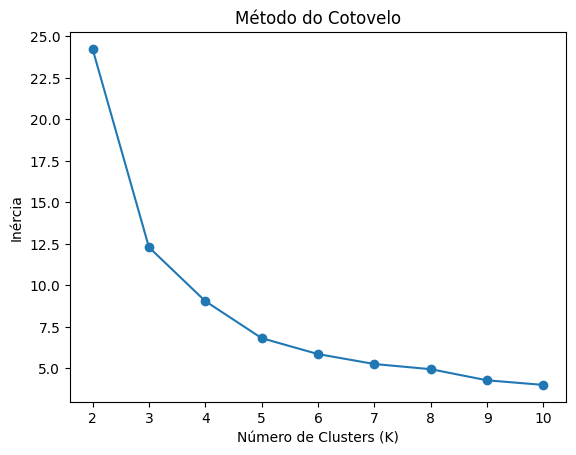

O melhor valor de K é: 2


In [24]:
# prompt: Selecionar apenas as colunas com o sufixo "_minmax"; Lista para armazenar a inércia para diferentes valores de K; Testar valores de K de 2 a 10; Plotar o gráfico do cotovelo; Encontrar o melhor valor de K (o ponto de inflexão no gráfico); Exibir o melhor valor de k

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Selecionar apenas as colunas com o sufixo "_minmax"
colunas_minmax = [col for col in df_normalizado.columns if col.endswith('_minmax')]
if not colunas_minmax:
    print("Nenhuma coluna com '_minmax' encontrada. Usando 'pc1' e 'pc2'.")
    colunas_minmax = ['pc1', 'pc2']  # Usar 'pc1' e 'pc2' como padrão
    if 'pc1' not in df_normalizado.columns or 'pc2' not in df_normalizado.columns:
        print("Colunas 'pc1' e 'pc2' não encontradas. Verifique o código anterior.")
        exit()
dados_clusterizacao = df_normalizado[colunas_minmax]

# Lista para armazenar a inércia para diferentes valores de K
inercia = []

# Testar valores de K de 2 a 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(dados_clusterizacao)
    inercia.append(kmeans.inertia_)

# Plotar o gráfico do cotovelo
plt.plot(range(2, 11), inercia, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inércia')
plt.show()

# Encontrar o melhor valor de K (o ponto de inflexão no gráfico)
# Uma abordagem simples é procurar a maior diferença entre os valores de inércia
diferencas_inercia = [inercia[i] - inercia[i+1] for i in range(len(inercia)-1)]
melhor_k = diferencas_inercia.index(max(diferencas_inercia)) + 2

# Exibir o melhor valor de k
print(f"O melhor valor de K é: {melhor_k}")

In [25]:
# prompt: Definir os hiperparâmetros do KMeans

# Define os hiperparâmetros do KMeans
n_clusters = melhor_k # Use o melhor_k encontrado pelo método do cotovelo
max_iter = 300
random_state = 0

# Cria o modelo KMeans com os hiperparâmetros definidos
kmeans = KMeans(n_clusters=n_clusters, max_iter=max_iter, random_state=random_state)

In [26]:
# prompt: Selecionar apenas as colunas com o sufixo "_minmax"; Substituir valores NaN por 0; Criar o modelo kmeans com os hiperparâmetros definidos; Ajustar o modelo aos dados; Obter os rótulos dos clusters para cada amostra; Adicionar os rótulos dos clusters ao dataset; Exibir os dados com os rótulos dos clusters

# Substituir valores NaN por 0
dados_clusterizacao = dados_clusterizacao.fillna(0)

# Ajustar o modelo aos dados
kmeans.fit(dados_clusterizacao)

# Obter os rótulos dos clusters para cada amostra
labels = kmeans.labels_

# Adicionar os rótulos dos clusters ao dataset
df_normalizado['cluster'] = labels

# Exibir os dados com os rótulos dos clusters
df_normalizado

,ID,Renda Mensal,Despesas Fixas,Despesas Variáveis,Investimentos,Dívidas,Patrimônio Líquido,Previsao,pc1,pc2,cluster
0,0.000000,0.430285,0.578013,0.568874,0.393351,0.361779,0.557302,1.0,0.006988,-0.028827,1
1,0.001001,0.655209,0.607576,0.460581,0.414418,0.372978,0.414613,1.0,0.046532,0.173690,1
2,0.002002,0.189085,0.603661,0.503753,0.398744,0.316592,0.463718,1.0,0.026114,-0.277063,0
3,0.003003,0.430300,0.673999,0.718305,0.356309,0.363077,0.506768,1.0,0.112928,-0.051944,1
4,0.004004,0.573697,0.597464,0.419394,0.507825,0.459518,0.448392,1.0,0.032171,0.111828,1
...,...,...,...,...,...,...,...,...,...,...,...
995,0.995996,0.533147,0.577263,0.443343,0.342586,0.449822,0.000000,1.0,0.034778,-0.024238,1
996,0.996997,0.367281,0.618084,0.545920,0.000000,0.362449,0.378747,1.0,0.047431,-0.161594,1
997,0.997998,0.468049,0.685071,0.455935,0.353582,0.471000,0.000000,1.0,0.141157,-0.089712,1
998,0.998999,0.570080,0.629703,0.400315,0.367255,0.414226,0.452689,1.0,0.060107,0.095174,1


In [27]:
# prompt: Contar a quantidade de exemplos por cluster; Exibir os resultados

# Contar a quantidade de exemplos por cluster
contagem_clusters = df_normalizado['cluster'].value_counts()

# Exibir os resultados
print("Quantidade de exemplos por cluster:")
contagem_clusters

Quantidade de exemplos por cluster:


,count
cluster,
1,883
0,117


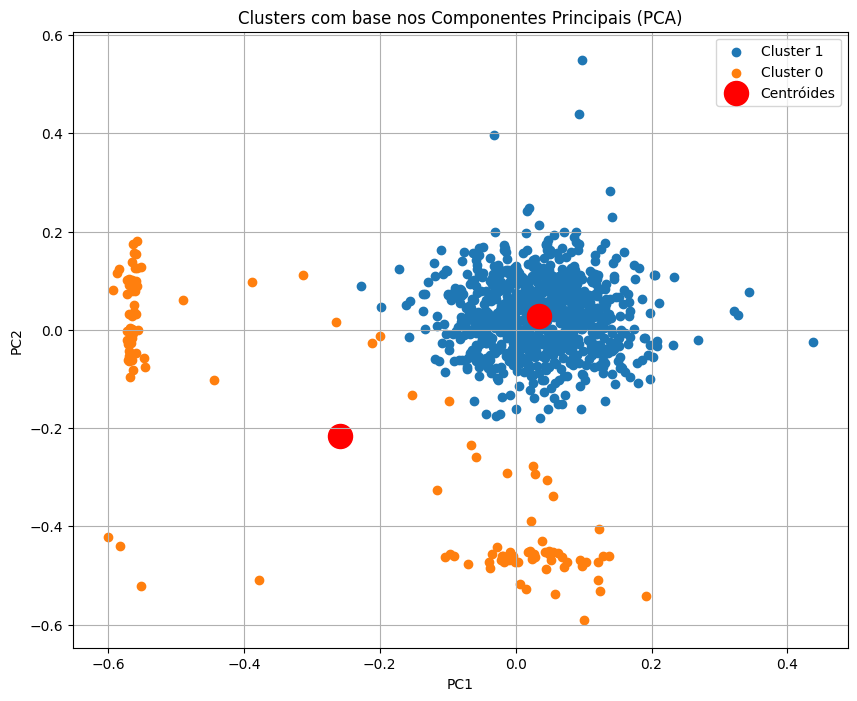

In [28]:
# prompt: Plotar o gráfico dos clusters com base nos componentes principais (PCA)

# Plotar o gráfico dos clusters com base nos componentes principais (PCA)
plt.figure(figsize=(10, 8))
for cluster in df_normalizado['cluster'].unique():
    plt.scatter(df_normalizado[df_normalizado['cluster'] == cluster]['pc1'],
                df_normalizado[df_normalizado['cluster'] == cluster]['pc2'],
                label=f'Cluster {cluster}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centróides')
plt.title('Clusters com base nos Componentes Principais (PCA)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid(True)
plt.show()

In [29]:
# prompt: Obter informações estatísticas para cada cluster

# Obter estatísticas descritivas para cada cluster
for cluster in df_normalizado['cluster'].unique():
    cluster_data = df_normalizado[df_normalizado['cluster'] == cluster]
    print(f"\nEstatísticas descritivas para o Cluster {cluster}:")
    print(cluster_data.describe())


Estatísticas descritivas para o Cluster 1:
               ID  Renda Mensal  Despesas Fixas  Despesas Variáveis  \
count  883.000000    883.000000      883.000000          883.000000   
mean     0.501156      0.506711        0.600487            0.471146   
std      0.290696      0.074388        0.074753            0.129443   
min      0.000000      0.259808        0.342019            0.000000   
25%      0.249750      0.458133        0.548608            0.443140   
50%      0.501502      0.503150        0.599767            0.489581   
75%      0.754254      0.553991        0.648084            0.533025   
max      1.000000      1.000000        1.000000            1.000000   

       Investimentos     Dívidas  Patrimônio Líquido    Previsao         pc1  \
count     883.000000  883.000000          883.000000  883.000000  883.000000   
mean        0.398809    0.380820            0.427254    0.970555    0.034328   
std         0.118154    0.104762            0.118276    0.169146    0.075543

In [30]:
# prompt: Contar a quantidade de dados para cada classe; Obter a classe minoritária; Obter a classe majoritária; Separar os dados em conjuntos de acordo com a classe; Realizar o balanceamento por meio do método de reamostragem (upsampling/oversampling) da classe minoritária; Combinar os dados majoritários e os dados minoritários reamostrados; Verificar se o balanceamento foi realizado com sucesso

# ... (código anterior permanece inalterado)

# Contar a quantidade de dados para cada cluster
contagem_clusters = df_normalizado['cluster'].value_counts()
print("Quantidade de dados para cada cluster:")
print(contagem_clusters)

# Obter a classe minoritária
classe_minoritaria = contagem_clusters.idxmin()
print(f"\nClasse minoritária: {classe_minoritaria}")

# Obter a classe majoritária
classe_majoritaria = contagem_clusters.idxmax()
print(f"\nClasse majoritária: {classe_majoritaria}")

# Separar os dados em conjuntos de acordo com a classe
dados_minoritarios = df_normalizado[df_normalizado['cluster'] == classe_minoritaria]
dados_majoritarios = df_normalizado[df_normalizado['cluster'] == classe_majoritaria]

# Realizar o balanceamento por meio do método de reamostragem (upsampling/oversampling) da classe minoritária
from sklearn.utils import resample

dados_minoritarios_reamostrados = resample(dados_minoritarios,
                                          replace=True,  # sample with replacement
                                          n_samples=len(dados_majoritarios),  # match number in majority class
                                          random_state=42)  # reproducible results

# Combinar os dados majoritários e os dados minoritários reamostrados
dados_balanceados = pd.concat([dados_majoritarios, dados_minoritarios_reamostrados])

# Verificar se o balanceamento foi realizado com sucesso
contagem_clusters_balanceados = dados_balanceados['cluster'].value_counts()
print("\nQuantidade de dados para cada cluster após o balanceamento:")
contagem_clusters_balanceados

Quantidade de dados para cada cluster:
cluster
1    883
0    117
Name: count, dtype: int64

Classe minoritária: 0

Classe majoritária: 1

Quantidade de dados para cada cluster após o balanceamento:


,count
cluster,
1,883
0,883


In [32]:
# prompt: Definir as regras de atribuição para as colunas; Aplicar as regras às colunas do dataset; Exibir as regras de atribuição

# Dicionário para armazenar as regras de atribuição para cada coluna
regras_atribuicao = {}

# Exemplo de regras de atribuição (substitua pelos seus critérios)
regras_atribuicao['Renda Mensal'] = {
    'baixa': lambda x: x < 3000,
    'media': lambda x: 3000 <= x < 7000,
    'alta': lambda x: x >= 7000
}

regras_atribuicao['Despesas Fixas'] = {
    'baixas': lambda x: x < 1000,
    'médias': lambda x: 1000 <= x < 3000,
    'altas': lambda x: x >= 3000
}


# Aplicar as regras de atribuição às colunas do dataset
for coluna, regras in regras_atribuicao.items():
    if coluna in df_normalizado.columns:  # Verificar se a coluna existe
        for categoria, regra in regras.items():
          # Criar uma nova coluna com a categoria
            df_normalizado[f'{coluna}_{categoria}'] = df_normalizado[coluna].apply(regra).astype(int)


# Exibir as regras de atribuição
print("Regras de Atribuição:")
for coluna, regras in regras_atribuicao.items():
    print(f"\nColuna: {coluna}")
    for categoria, regra in regras.items():
        print(f"  Categoria: {categoria} - Regra: {regra}")

# Exibir o dataframe com as novas colunas
print("\nDataFrame com as novas colunas:")
print(df_normalizado.head())

Regras de Atribuição:

Coluna: Renda Mensal
  Categoria: baixa - Regra: <function <lambda> at 0x7de79336fc70>
  Categoria: media - Regra: <function <lambda> at 0x7de79336fd00>
  Categoria: alta - Regra: <function <lambda> at 0x7de7933ac0d0>

Coluna: Despesas Fixas
  Categoria: baixas - Regra: <function <lambda> at 0x7de7933ac160>
  Categoria: médias - Regra: <function <lambda> at 0x7de7933ac1f0>
  Categoria: altas - Regra: <function <lambda> at 0x7de7933ac280>

DataFrame com as novas colunas:
         ID  Renda Mensal  Despesas Fixas  Despesas Variáveis  Investimentos  \
0  0.000000      0.430285        0.578013            0.568874       0.393351   
1  0.001001      0.655209        0.607576            0.460581       0.414418   
2  0.002002      0.189085        0.603661            0.503753       0.398744   
3  0.003003      0.430300        0.673999            0.718305       0.356309   
4  0.004004      0.573697        0.597464            0.419394       0.507825   

    Dívidas  Patrimôn

In [33]:
# prompt: Separar os dados em treino e teste (80/20); Exibir o tamanho dos conjuntos de treino e teste; Apresentar o conteúdo dos conjuntos de treino e teste

from sklearn.model_selection import train_test_split

# Supondo que 'df_normalizado' seja o seu DataFrame final
# Remova a coluna 'ID' se ela não for necessária para o treinamento
if 'ID' in df_normalizado.columns:
    df_normalizado = df_normalizado.drop('ID', axis=1)

# Separar os dados em treino e teste (80/20)
df_treino, df_teste = train_test_split(df_normalizado, test_size=0.2, random_state=42)

# Exibir o tamanho dos conjuntos de treino e teste
print("Tamanho do conjunto de treino:", len(df_treino))
print("Tamanho do conjunto de teste:", len(df_teste))

# Apresentar o conteúdo dos conjuntos de treino e teste
print("\nConjunto de treino:")
print(df_treino.head())
print("\nConjunto de teste:")
print(df_teste.head())

Tamanho do conjunto de treino: 800
Tamanho do conjunto de teste: 200

Conjunto de treino:
     Renda Mensal  Despesas Fixas  Despesas Variáveis  Investimentos  \
29       0.000000        0.711239            0.449042       0.000000   
535      0.409517        0.622028            0.456689       0.451154   
695      0.507221        0.540737            0.506608       0.366959   
557      0.552922        0.567329            0.452303       0.510644   
836      0.424037        0.763767            0.482428       0.417370   

      Dívidas  Patrimônio Líquido  Previsao       pc1       pc2  cluster  \
29   0.412701            0.422035       0.0  0.121201 -0.509489        0   
535  0.520141            0.398335       1.0  0.055931 -0.066025        1   
695  0.328128            0.482157       1.0 -0.027517  0.034900        1   
557  0.424491            0.558819       1.0 -0.003403  0.110005        1   
836  0.413468            0.441642       1.0  0.194759 -0.051753        1   

     Renda Mensal_ba

In [34]:
# prompt: Definir os hiperparâmetros para o modelo MultiLayer Perceptron

from sklearn.neural_network import MLPClassifier

# Definir os hiperparâmetros para o modelo MLP
hidden_layer_sizes = (100, 50)  # Duas camadas ocultas com 100 e 50 neurônios
activation = 'relu'  # Função de ativação ReLU
solver = 'adam'  # Otimizador Adam
alpha = 0.0001  # Parâmetro de regularização L2
batch_size = 'auto'  # Tamanho do mini-batch automático
learning_rate = 'constant'  # Taxa de aprendizado constante
learning_rate_init = 0.001  # Taxa de aprendizado inicial
power_t = 0.5  # Expoente para a taxa de aprendizado (inverso)
max_iter = 200  # Número máximo de iterações
shuffle = True  # Embaralhar os dados a cada época
random_state = None  # Semente aleatória
tol = 0.0001  # Tolerância para a convergência
verbose = False  # Não exibir informações de treinamento
warm_start = False  # Não reiniciar o treinamento com os pesos anteriores
momentum = 0.9  # Momento para o otimizador
nesterovs_momentum = True  # Usar o momento de Nesterov
early_stopping = False  # Não usar parada antecipada
validation_fraction = 0.1  # Fração dos dados para validação (parada antecipada)
beta_1 = 0.9  # Parâmetro beta_1 para o otimizador Adam
beta_2 = 0.999  # Parâmetro beta_2 para o otimizador Adam
epsilon = 1e-08  # Parâmetro epsilon para o otimizador Adam
n_iter_no_change = 10  # Número máximo de épocas sem melhora (parada antecipada)
max_fun = 15000  # Número máximo de chamadas à função de perda

# Criar o modelo MLP com os hiperparâmetros definidos
mlp_model = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, activation=activation, solver=solver,
                         alpha=alpha, batch_size=batch_size, learning_rate=learning_rate,
                         learning_rate_init=learning_rate_init, power_t=power_t, max_iter=max_iter,
                         shuffle=shuffle, random_state=random_state, tol=tol, verbose=verbose,
                         warm_start=warm_start, momentum=momentum, nesterovs_momentum=nesterovs_momentum,
                         early_stopping=early_stopping, validation_fraction=validation_fraction,
                         beta_1=beta_1, beta_2=beta_2, epsilon=epsilon, n_iter_no_change=n_iter_no_change,
                         max_fun=max_fun)

# ... (código anterior permanece inalterado)

In [35]:
# prompt: Definir os hiperparâmetros para o modelo Support Vector Machine

from sklearn.svm import SVC

# Definir os hiperparâmetros para o modelo SVM
C = 1.0  # Parâmetro de regularização
kernel = 'rbf'  # Kernel gaussiano (radial basis function)
degree = 3  # Grau do kernel polinomial (se usado)
gamma = 'scale'  # Parâmetro do kernel gaussiano ('scale' ou 'auto' ou um valor numérico)
coef0 = 0.0  # Constante independente para kernels polinomiais e sigmoid
shrinking = True  # Usar heurística de shrinking
probability = False  # Não calcular probabilidades
tol = 1e-3  # Tolerância para a convergência
cache_size = 200  # Tamanho do cache em MB
class_weight = None  # Nenhum peso de classe
verbose = False  # Não exibir informações de treinamento
max_iter = -1  # Número máximo de iterações (-1 para ilimitado)
decision_function_shape = 'ovr'  # Estratégia de decisão ('ovo' ou 'ovr')
break_ties = False # Não quebra empates
random_state = None  # Semente aleatória

# Criar o modelo SVM com os hiperparâmetros definidos
svm_model = SVC(C=C, kernel=kernel, degree=degree, gamma=gamma, coef0=coef0, shrinking=shrinking,
                probability=probability, tol=tol, cache_size=cache_size, class_weight=class_weight,
                verbose=verbose, max_iter=max_iter, decision_function_shape=decision_function_shape,
                break_ties=break_ties, random_state=random_state)

In [36]:
# prompt: Treinar e avaliar o modelo com validação cruzada; Imprimir os resultados da validação cruzada; Treinar o modelo com os dados de treinamento completos; Fazer previsões com o modelo no conjunto de teste; Calcular as métricas de avaliação para o modelo MLP

from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Separar features (X) e target (y)
X = df_treino.drop('cluster', axis=1)
y = df_treino['cluster']

# Definir o número de folds para a validação cruzada
n_splits = 5  # Número de folds (ajuste conforme necessário)
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)


# Validação cruzada com o modelo MLP
scores_mlp = cross_val_score(mlp_model, X, y, cv=kf, scoring='accuracy') #scoring='f1_macro'

# Imprimir os resultados da validação cruzada para o modelo MLP
print("Resultados da Validação Cruzada (MLP):")
print("Acurácia para cada fold:", scores_mlp)
print("Acurácia média:", np.mean(scores_mlp))
print("Desvio padrão da acurácia:", np.std(scores_mlp))

# Treinar o modelo MLP com todos os dados de treinamento
mlp_model.fit(X, y)


# Fazer previsões com o modelo MLP no conjunto de teste
X_test = df_teste.drop('cluster', axis=1)
y_test = df_teste['cluster']
y_pred_mlp = mlp_model.predict(X_test)


# Calcular as métricas de avaliação para o modelo MLP
print("\nAvaliação do Modelo MLP no Conjunto de Teste:")
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_mlp))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred_mlp))
print("\nAcurácia:", accuracy_score(y_test, y_pred_mlp))

Resultados da Validação Cruzada (MLP):
Acurácia para cada fold: [0.99375 1.      0.99375 1.      1.     ]
Acurácia média: 0.9974999999999999
Desvio padrão da acurácia: 0.003061862178478962

Avaliação do Modelo MLP no Conjunto de Teste:
Matriz de Confusão:
 [[ 20   0]
 [  0 180]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00       180

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200


Acurácia: 1.0


In [37]:
# prompt: Treinar e avaliar o modelo com validação cruzada; Imprimir os resultados da validação cruzada; Treinar o modelo com os dados de treinamento completos; Fazer previsões com o modelo no conjunto de teste; Calcular as métricas de avaliação para o modelo SVM

# Validação cruzada com o modelo SVM
scores_svm = cross_val_score(svm_model, X, y, cv=kf, scoring='accuracy')

# Imprimir os resultados da validação cruzada para o modelo SVM
print("\nResultados da Validação Cruzada (SVM):")
print("Acurácia para cada fold:", scores_svm)
print("Acurácia média:", np.mean(scores_svm))
print("Desvio padrão da acurácia:", np.std(scores_svm))

# Treinar o modelo SVM com todos os dados de treinamento
svm_model.fit(X, y)

# Fazer previsões com o modelo SVM no conjunto de teste
y_pred_svm = svm_model.predict(X_test)

# Calcular as métricas de avaliação para o modelo SVM
print("\nAvaliação do Modelo SVM no Conjunto de Teste:")
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_svm))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred_svm))
print("\nAcurácia:", accuracy_score(y_test, y_pred_svm))


Resultados da Validação Cruzada (SVM):
Acurácia para cada fold: [0.98125 0.9875  0.96875 1.      1.     ]
Acurácia média: 0.9875
Desvio padrão da acurácia: 0.011858541225631427

Avaliação do Modelo SVM no Conjunto de Teste:
Matriz de Confusão:
 [[ 20   0]
 [  0 180]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00       180

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200


Acurácia: 1.0


In [38]:
# prompt: Verificar qual o modelo campeão; Salvar o modelo; Carregar o modelo e usar os dados de teste para validar exibindo as métricas

import joblib

# Comparar as métricas de avaliação dos modelos MLP e SVM
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

if accuracy_mlp > accuracy_svm:
  champion_model = mlp_model
  champion_model_name = "MLP"
  print(f"\nO modelo campeão é o {champion_model_name}, com acurácia: {accuracy_mlp}")
else:
  champion_model = svm_model
  champion_model_name = "SVM"
  print(f"\nO modelo campeão é o {champion_model_name}, com acurácia: {accuracy_svm}")


# Salvar o modelo campeão
filename = 'champion_model.sav'
joblib.dump(champion_model, filename)
print(f"Modelo campeão salvo em {filename}")


# Carregar o modelo
loaded_model = joblib.load(filename)

# Usar os dados de teste para validar o modelo carregado
y_pred_loaded = loaded_model.predict(X_test)

# Calcular as métricas de avaliação para o modelo carregado
print("\nAvaliação do Modelo Carregado no Conjunto de Teste:")
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_loaded))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred_loaded))
print("\nAcurácia:", accuracy_score(y_test, y_pred_loaded))


O modelo campeão é o SVM, com acurácia: 1.0
Modelo campeão salvo em champion_model.sav

Avaliação do Modelo Carregado no Conjunto de Teste:
Matriz de Confusão:
 [[ 20   0]
 [  0 180]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00       180

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200


Acurácia: 1.0
